In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train = tf.image.resize(np.array(X_train)[..., tf.newaxis], (32, 32))
X_train = np.repeat(X_train, 3, axis=-1)
X_test = tf.image.resize(np.array(X_test)[..., tf.newaxis], (32, 32))
X_test = np.repeat(X_test, 3, axis=-1)
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [5]:
X_train.shape, X_test.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [8]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    X_train, y_train, epochs=8, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/8
375/375 [==============================] - 805s 2s/step - loss: 0.6242 - accuracy: 0.7865 - val_loss: 0.4707 - val_accuracy: 0.8298
Epoch 2/8
375/375 [==============================] - 783s 2s/step - loss: 0.4322 - accuracy: 0.8432 - val_loss: 0.4282 - val_accuracy: 0.8432
Epoch 3/8
375/375 [==============================] - 784s 2s/step - loss: 0.3947 - accuracy: 0.8563 - val_loss: 0.4119 - val_accuracy: 0.8478
Epoch 4/8
375/375 [==============================] - 781s 2s/step - loss: 0.3737 - accuracy: 0.8633 - val_loss: 0.4024 - val_accuracy: 0.8521
Epoch 5/8
375/375 [==============================] - 779s 2s/step - loss: 0.3543 - accuracy: 0.8697 - val_loss: 0.3916 - val_accuracy: 0.8583
Epoch 6/8
375/375 [==============================] - 782s 2s/step - loss: 0.3432 - accuracy: 0.8730 - val_loss: 0.3827 - val_accuracy: 0.8635
Epoch 7/8
375/375 [==============================] - 780s 2s/step - loss: 0.3307 - accuracy: 0.8778 - val_loss: 0.3818 - val_accuracy: 0.8594
Epoch 

In [11]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 124s 398ms/step - loss: 0.3819 - accuracy: 0.8679
[0.3819462060928345, 0.867900013923645]


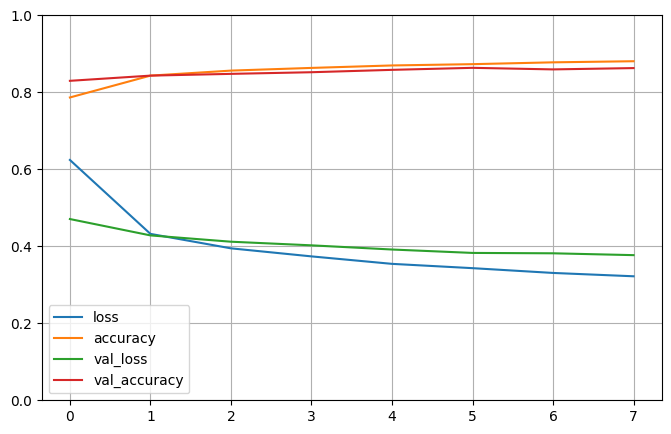

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [14]:
#let's do additional training of the last three layers
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = model.fit(
    X_train, y_train, epochs=2, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/2
375/375 [==============================] - 722s 2s/step - loss: 0.2890 - accuracy: 0.8951 - val_loss: 0.3542 - val_accuracy: 0.8712
Epoch 2/2
375/375 [==============================] - 781s 2s/step - loss: 0.2849 - accuracy: 0.8966 - val_loss: 0.3531 - val_accuracy: 0.8706


In [16]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 126s 402ms/step - loss: 0.3628 - accuracy: 0.8689
[0.3628113269805908, 0.8689000010490417]


**Висновок:** Звичайна мережа досягла кращої точності ніж VGG16 при однаковому розмірі батчу та однаковій кількості навчальних.